In [1]:
# Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, cohen_kappa_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import tree
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier


In [3]:
#Read/Importing data
df= pd.read_csv(r'Mobile_data.csv')

In [4]:
#To Display all the rows and columns of table
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) 

In [5]:
#Keeping copy of file for future 
df1= df.copy()

In [6]:
## Data Cleaning and Preprocessing

In [7]:
#To display top 5 rows of the table
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [8]:
#To display number of rows and columns
df.shape

(2000, 15)

In [9]:
#To display columns, data types, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [10]:
#To display data types of columns
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [11]:
#To display list of columns
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [12]:
#To display number of missing values and treat them
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [13]:
#To check missing values in percentage
(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

battery_power    0.0
clock_speed      0.0
fc               0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
price_range      0.0
dtype: float64

In [16]:
#Droping rows with less missing values
df.dropna(axis=0, inplace=True)

In [17]:
#To display number of duplicate values
df.duplicated().sum()

0

In [18]:
#To display columns that are numeric and categorical
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index([], dtype='object')
Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')


In [19]:
#To display values and its count for categorical columns
for i in cat_cols:
    print(f'Feature {i}')
    print(f'Unique Values - {df[i].nunique()}')
    print(f'Value Counts\n{df[i].value_counts()}')
    print('-'*40)

In [20]:
# EDA - Exploratory Data Analysis

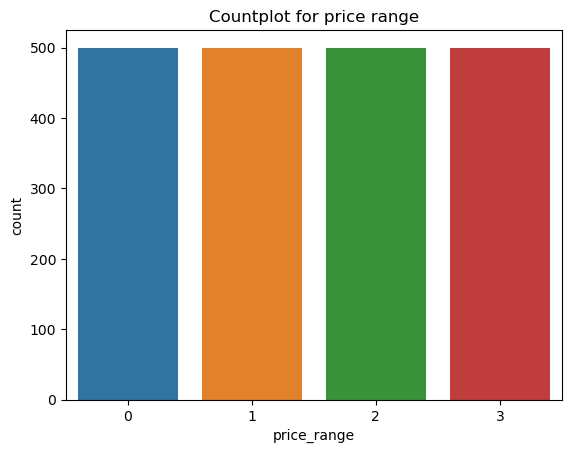

In [21]:
#To display countplot of target variable
sns.countplot(x=df['price_range'])
plt.title('Countplot for price range')
plt.show()

In [22]:
#To display basic statistical values for numeric columns
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [23]:
# Univariate analysis

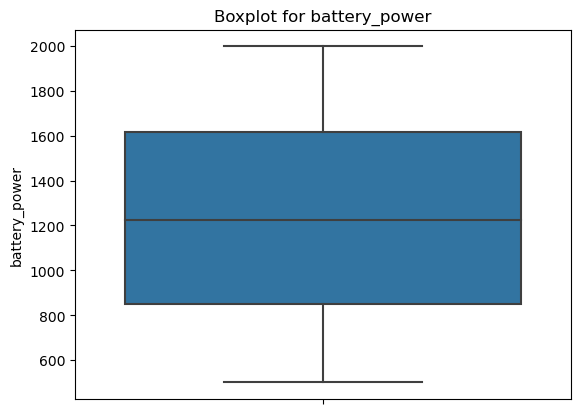

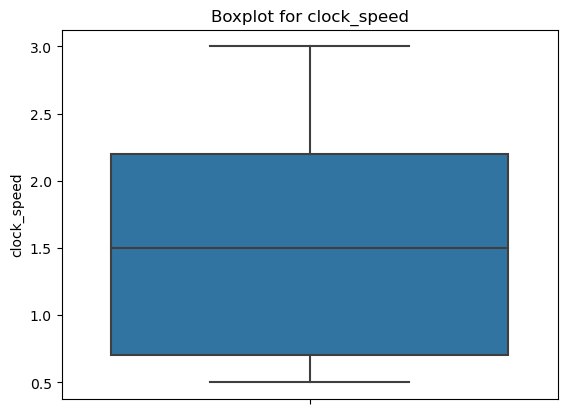

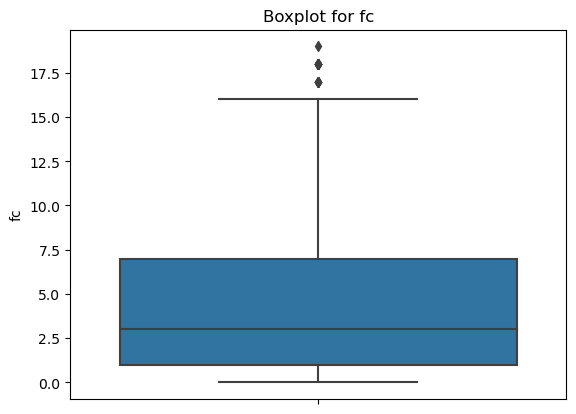

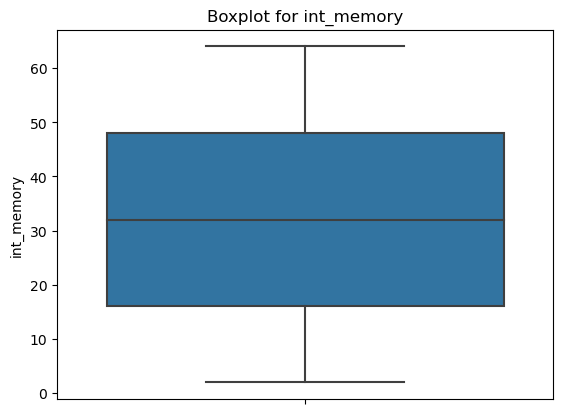

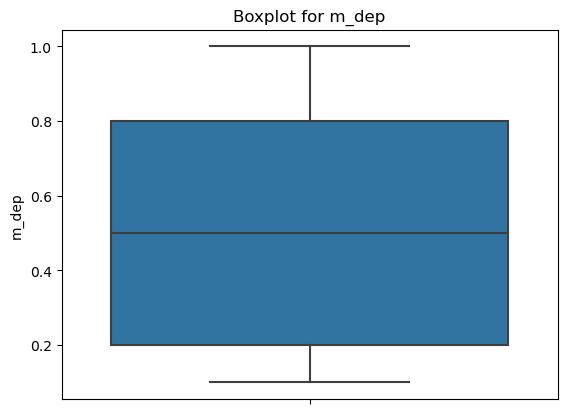

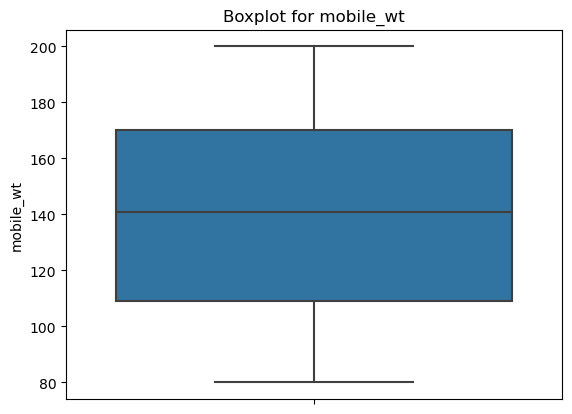

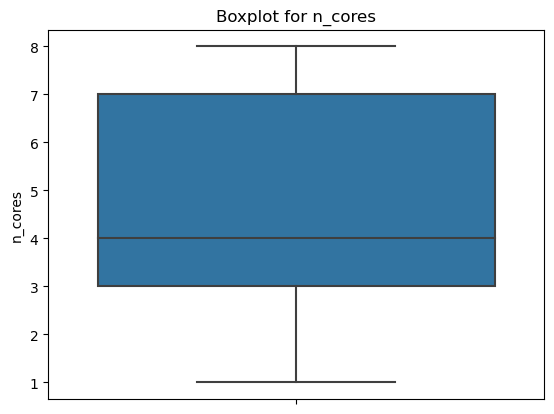

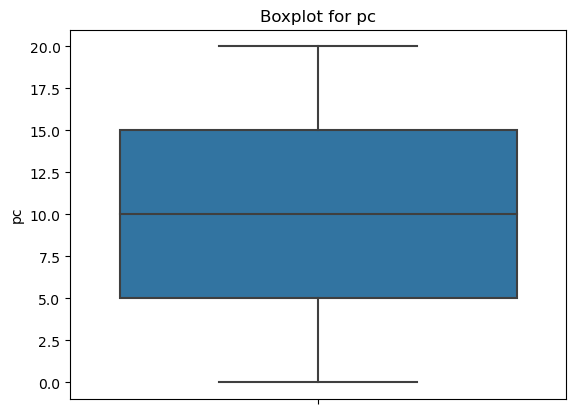

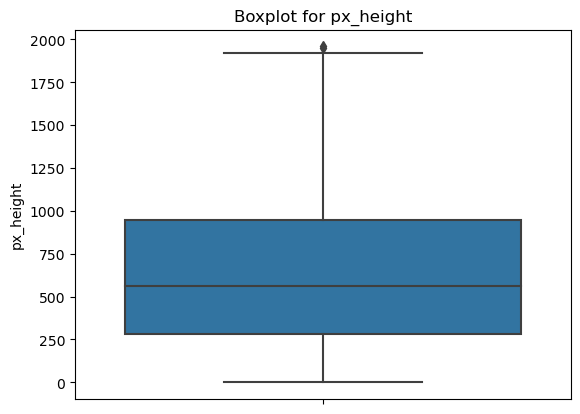

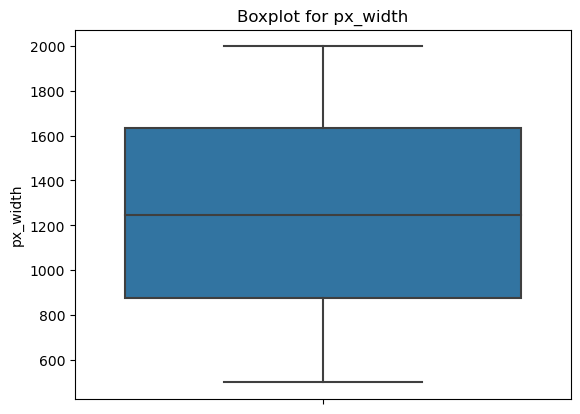

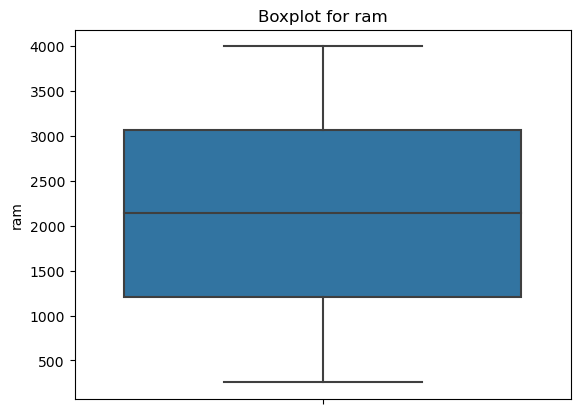

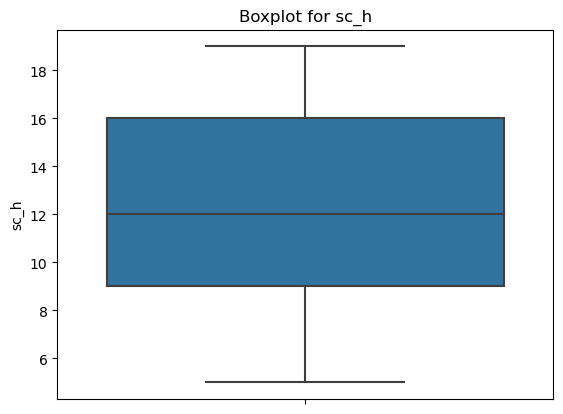

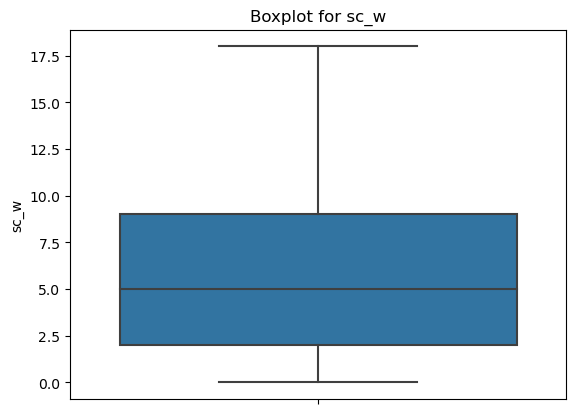

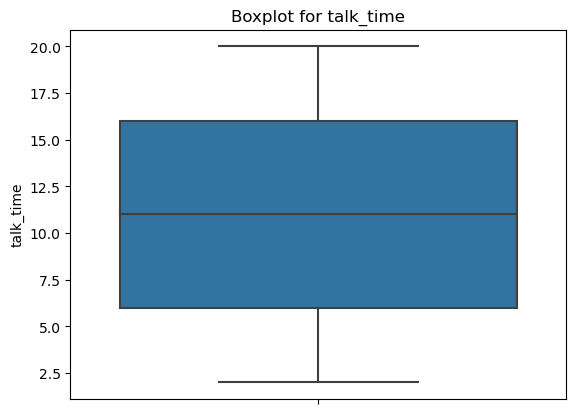

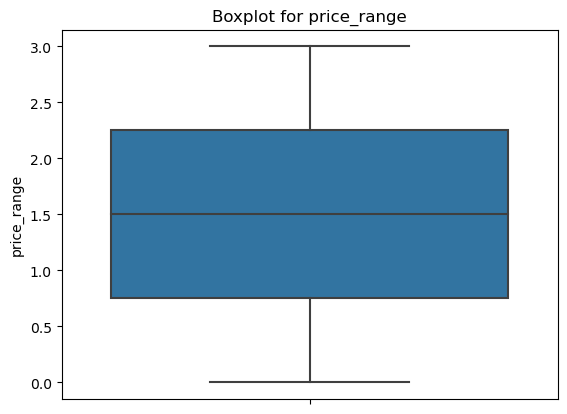

In [31]:
#To display box plot for all numeric columns
for i in num_cols:
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [25]:
# Bi-Variate Analysis

In [26]:
#To display pair plot between two numeric columns
# sns.pairplot(df,vars=num_cols)  
# plt.show()

In [27]:
#Multi-variate Analysis

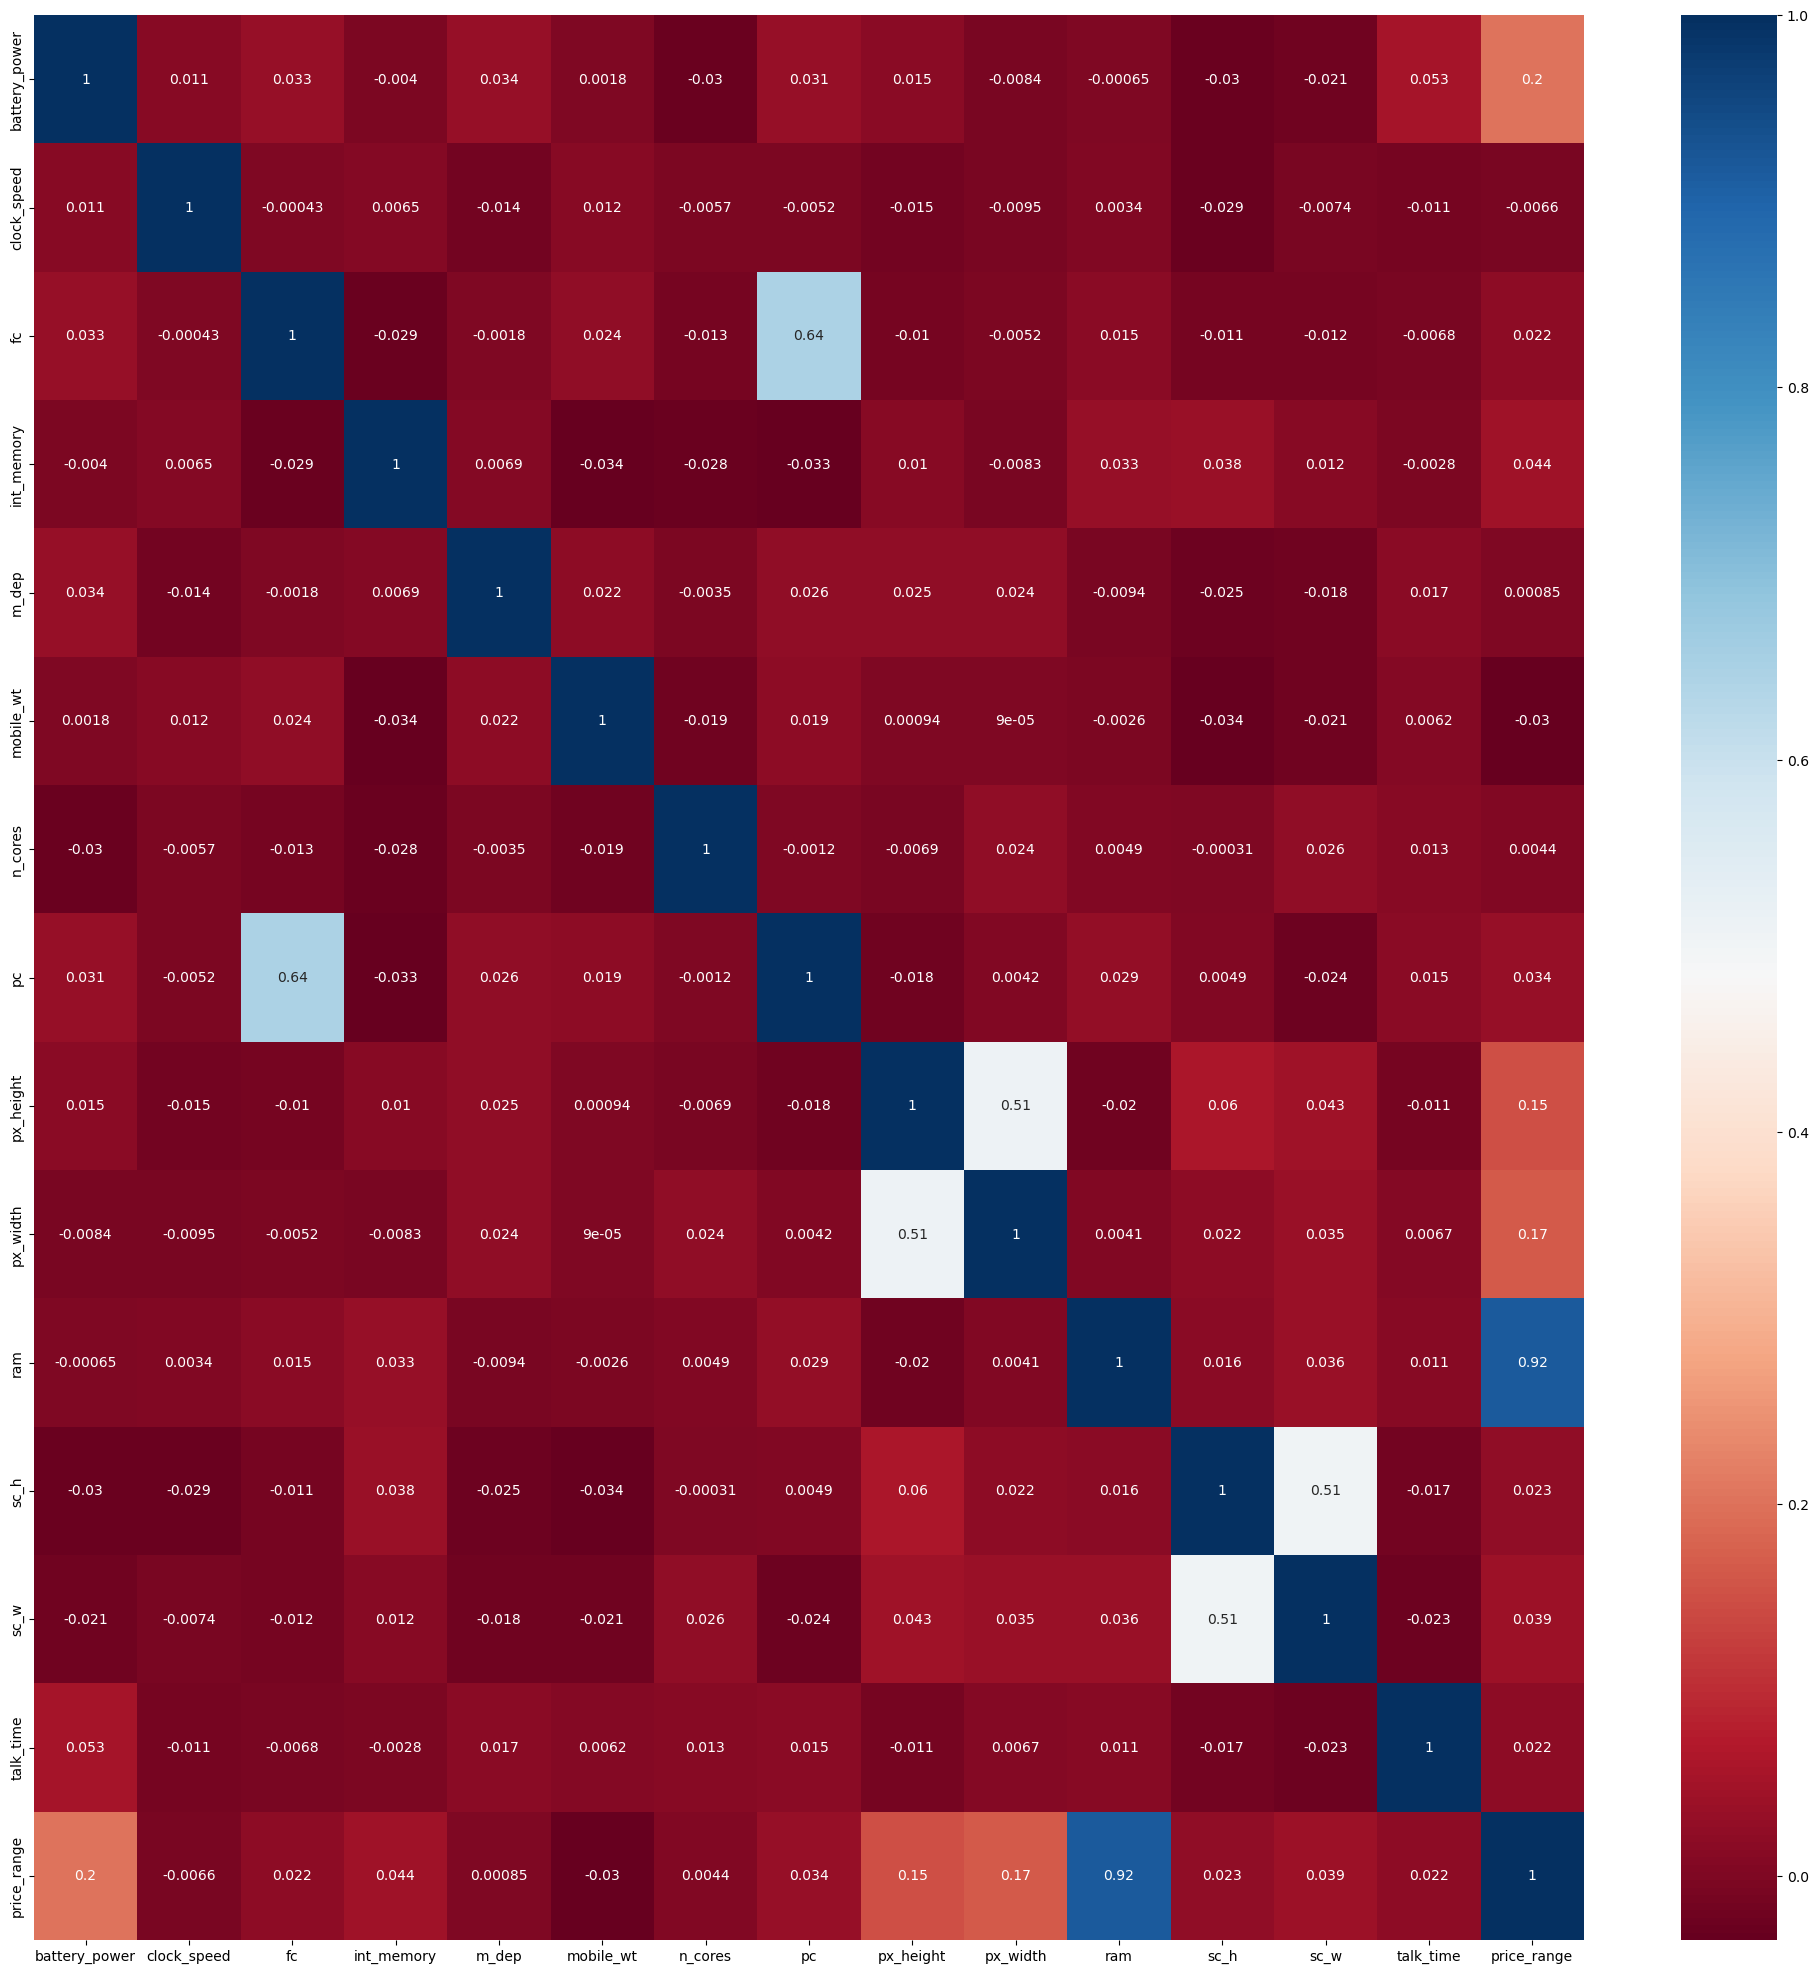

In [28]:
#To display correlation between different columns
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

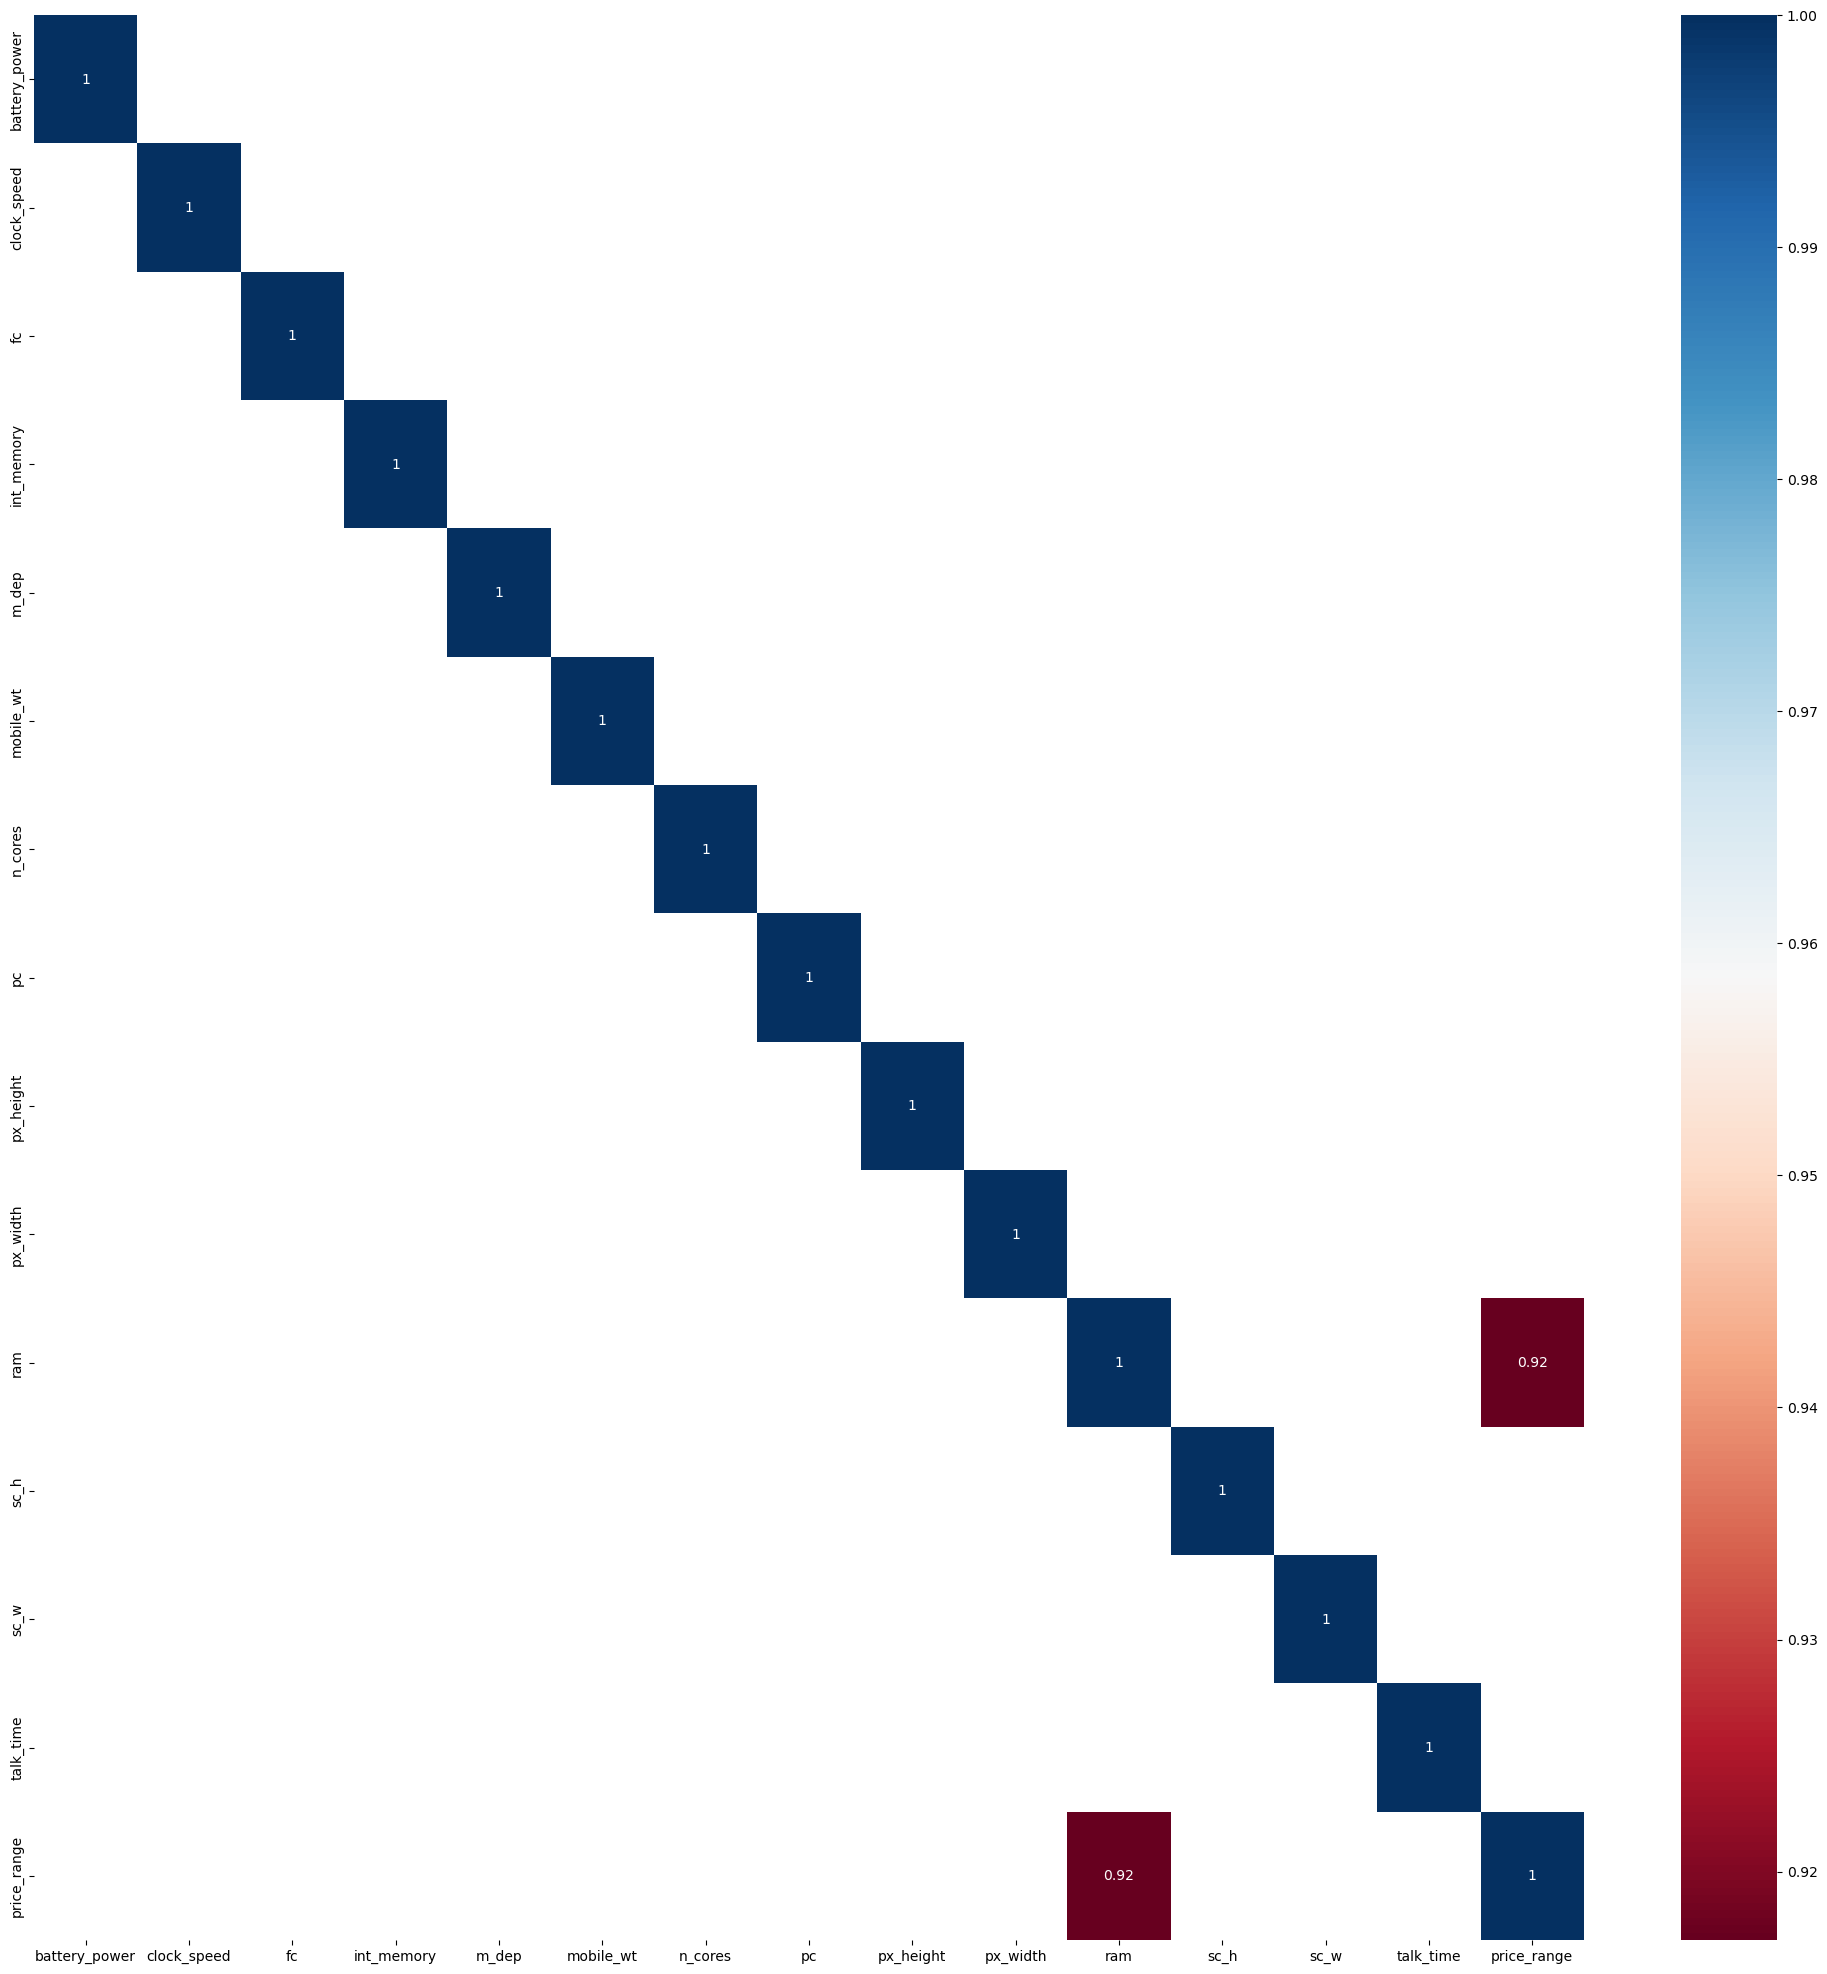

In [29]:
#To display columns that have high correlation
plt.figure(figsize=(25,25))
sns.heatmap(corr[abs(corr)>=0.7], annot=True, cmap='RdBu')
plt.show()

In [32]:
# Outlier Treatment

In [33]:
df.describe(percentiles=[0.01,0.03,0.05,0.10,0.90,0.95,0.97,0.99]).T

,count,mean,std,min,1%,3%,5%,10%,50%,90%,95%,97%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,510.00,538.97,570.95,634.9,1226.0,1851.0,1930.15,1961.06,1987.00,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.50,0.50,0.50,0.5,1.5,2.7,2.80,2.90,3.00,3.0
fc,2000.0,4.30950,4.341444,0.0,0.00,0.00,0.00,0.0,3.0,11.0,13.00,15.00,16.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,2.00,3.00,5.00,7.9,32.0,57.0,61.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.10,0.10,0.10,0.1,0.5,0.9,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,80.00,83.00,86.00,91.0,141.0,189.0,196.00,198.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,1.00,1.00,1.00,1.0,4.0,8.0,8.00,8.00,8.00,8.0
pc,2000.0,9.91650,6.064315,0.0,0.00,0.00,0.00,1.0,10.0,18.0,20.00,20.00,20.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,15.00,45.97,70.95,125.9,564.0,1285.0,1485.05,1618.03,1791.01,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,512.99,542.00,579.85,661.9,1247.0,1854.0,1929.05,1963.00,1987.00,1998.0


In [34]:
df['fc'] = np.where(df['fc']>16,16,df['fc'])

In [35]:
# Model building

In [36]:
# Creating Function to evalute the model performance

In [59]:
def eval_model(model,x_train,x_test,y_train,y_test):
    global train_score, test_score, precision, recall, acc, kappa, f1

    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)

    print('\nTraining Score is:', round(train_score,4)*100, '%')
    print('Testing Score is:', round(test_score,4)*100, '%\n')

    cm = confusion_matrix(y_test,y_pred)
    print('\nConfusion Matrix is\n', cm)

    print('\nPredictions:\n',y_pred)
    print(classification_report(y_test,y_pred))

    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="RdBu", cbar=False)
    plt.show()

In [68]:
score_card = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score'])

def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name, 'Train Score': train_score, 
                                    'Test Score': test_score}, ignore_index = True)
    return(score_card)

In [69]:
#Select the Dependent and Independent Features
x = df.drop('price_range',axis=1)
y = df['price_range']
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(2000, 14) (2000,)


In [70]:
#Split the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1000)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 14)
(600, 14)
(1400,)
(600,)


In [71]:
# Logistic Regression


Training Score is: 76.42999999999999 %
Testing Score is: 75.33 %


Confusion Matrix is
 [[127  16   0   0]
 [ 23 103  29   1]
 [  0  26  93  33]
 [  0   0  20 129]]

Predictions:
 [3 1 3 2 3 1 0 1 1 3 1 2 3 1 0 3 1 3 1 3 2 3 3 3 3 2 3 0 2 1 2 3 0 2 3 3 0
 2 2 3 2 0 0 1 3 3 2 2 2 0 0 1 0 0 3 1 3 0 3 0 0 3 1 0 3 0 1 0 0 0 0 2 1 0
 1 3 3 2 3 0 0 2 1 2 0 1 1 1 3 1 3 0 0 1 3 3 2 0 2 0 2 3 1 3 2 2 0 2 0 3 0
 0 2 2 0 0 3 0 1 3 1 0 3 0 1 1 3 2 2 3 2 0 2 2 1 1 2 1 1 3 2 3 1 3 3 2 1 1
 3 2 0 0 1 3 0 1 1 2 0 0 3 1 2 2 3 1 2 1 0 3 2 1 0 1 0 1 2 0 2 1 2 0 2 2 1
 3 3 0 2 2 3 2 1 1 3 0 0 1 2 1 3 3 0 2 3 0 3 0 1 2 0 1 3 1 3 0 3 0 2 1 2 2
 3 2 0 2 1 3 2 3 3 3 3 1 3 0 3 1 3 3 2 0 0 0 3 3 0 3 0 2 1 0 1 3 2 3 1 0 2
 2 1 1 0 2 0 2 1 2 3 3 0 1 3 3 1 0 2 0 0 1 0 1 2 1 2 2 0 3 1 1 2 0 0 2 0 2
 2 0 1 0 3 3 1 1 3 3 3 3 0 3 0 1 1 3 3 3 2 0 1 2 3 0 3 1 1 0 0 3 0 3 1 0 2
 3 2 1 0 3 2 2 0 3 2 1 1 0 1 1 1 2 3 2 3 2 2 0 1 2 1 2 3 1 2 0 3 2 0 1 0 1
 1 3 0 2 0 3 0 1 1 1 1 0 1 3 3 2 2 1 1 3 0 3 1 3 2 0 3 3 0 1 0 3 1 0 

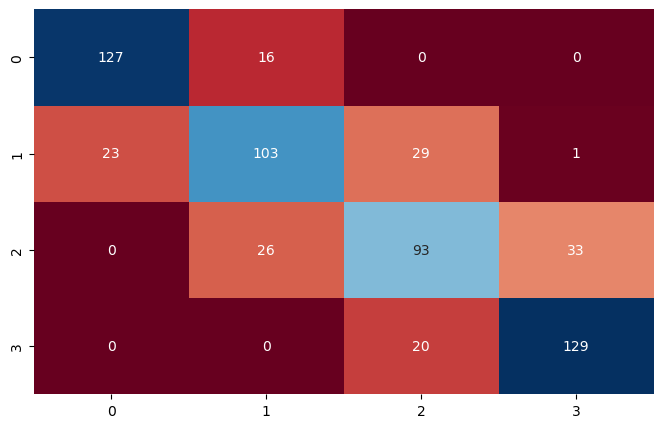

In [72]:
lr = LogisticRegression(max_iter=10000)
eval_model(lr,x_train,x_test,y_train,y_test)

In [73]:
#### Creating tabulated data for evaluation matrix

In [74]:
update_score_card(model_name = 'Logistic Regression')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333


In [75]:
#### Logistic Regression (using SGD)


Training Score is: 47.14 %
Testing Score is: 47.5 %


Confusion Matrix is
 [[118   0  25   0]
 [ 35   0 121   0]
 [  0   0 152   0]
 [  0   0 134  15]]

Predictions:
 [2 2 3 2 2 2 0 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 0 2 0 0 2 2 2 2 3 0 0 2 2 0 2 0 2 0 0 0 0 2 2 0
 2 2 2 2 2 0 0 2 2 2 0 2 2 0 2 2 2 0 0 2 2 2 2 0 2 0 2 2 2 2 2 2 0 2 0 2 0
 0 2 2 0 0 2 0 2 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0
 2 2 0 0 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 0 0 2 0 2 2 0 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 0 2 2 0 2 0 2 2 0 0 2 2 2 0 2 0 2 2 2 2
 3 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 3 2 0 0 0 2 2 0 2 0 2 2 0 0 2 2 2 2 0 2
 2 2 2 0 2 0 2 2 2 2 3 0 2 2 2 2 2 2 0 0 2 0 0 2 2 2 2 0 2 2 2 2 0 0 2 2 2
 2 0 2 0 2 2 0 2 2 2 2 2 0 2 0 0 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 0 2 0 0
 2 2 0 2 0 3 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 3 2 2 2 0 2 2 0 2 2 2 0 0 2 2 0
 2 2 2 

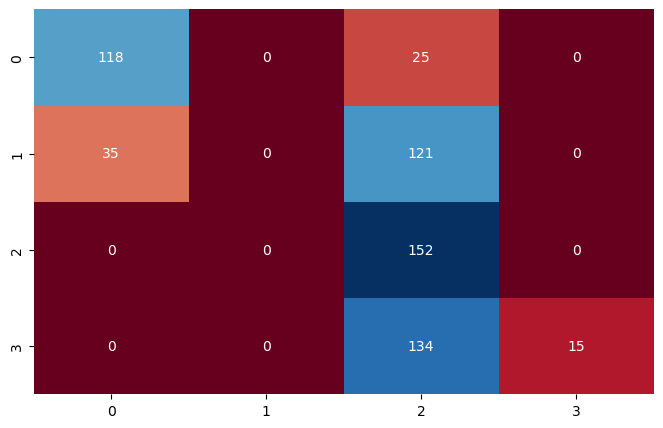

In [80]:
lr_SGD = SGDClassifier(loss = 'log', random_state = 10)
eval_model(lr_SGD,x_train,x_test,y_train,y_test)

In [82]:
update_score_card(model_name = 'Logistic Regression using SGD')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000


In [83]:
# Decision Tree Classifier


Training Score is: 100.0 %
Testing Score is: 82.0 %


Confusion Matrix is
 [[138   5   0   0]
 [ 23 112  21   0]
 [  0  19 113  20]
 [  0   0  20 129]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 0 1 2 1 0 3 2 3 1 3 2 3 2 3 3 2 3 0 2 2 1 2 0 2 3 3 0
 2 1 3 2 0 0 1 2 3 2 3 2 0 0 1 0 0 2 1 3 0 3 0 0 3 0 1 2 0 0 1 0 0 0 2 1 0
 1 3 3 2 3 0 0 2 1 2 0 1 2 0 3 1 3 0 0 0 2 2 2 0 2 0 1 3 1 2 2 1 0 2 0 3 0
 0 3 2 0 0 2 0 2 3 1 2 3 0 1 1 2 2 1 3 2 0 2 2 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 2 0 2 1 2 0 0 3 2 2 2 3 2 2 2 0 3 2 0 0 1 0 2 3 1 2 1 2 2 2 2 0
 3 2 1 1 1 3 2 0 1 3 0 0 1 3 2 3 3 0 2 3 0 2 0 1 3 1 1 3 0 3 0 3 0 1 1 1 2
 3 1 0 2 0 2 3 3 2 3 3 2 3 0 3 0 3 3 3 0 0 0 2 3 0 3 0 2 0 0 1 3 2 2 1 0 2
 1 1 1 0 3 0 3 2 2 3 3 0 1 3 3 1 0 2 1 0 1 0 1 1 1 3 1 0 3 1 1 1 0 0 2 0 1
 2 0 2 1 3 2 0 1 3 2 2 3 0 3 1 0 1 2 2 3 3 0 1 2 3 0 2 2 1 0 0 2 0 3 0 1 2
 2 2 1 0 3 2 2 0 3 2 1 2 0 1 2 1 3 3 2 3 2 1 0 1 3 1 2 3 2 1 0 3 1 0 0 1 0
 1 3 0 2 0 3 1 1 0 2 1 0 1 3 3 2 1 2 1 3 0 3 2 2 2 0 1 3 0 0 0 1 2 0 2 1 0
 1 3 2 

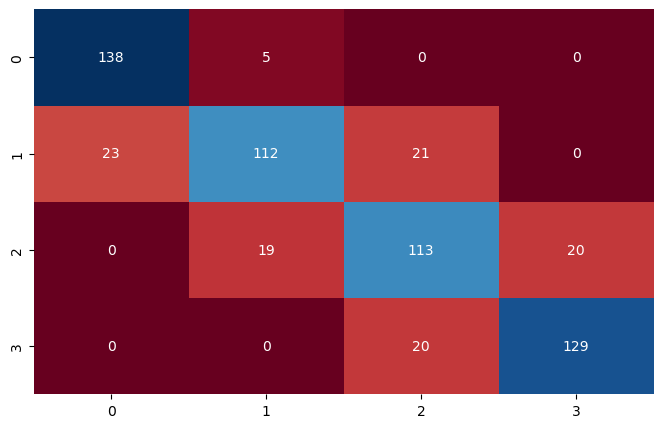

In [84]:
dt1 = DecisionTreeClassifier(criterion='gini')
eval_model(dt1,x_train,x_test,y_train,y_test)

In [ ]:
update_score_card(model_name = 'Decision Tree Classifier')

In [86]:
# Decision Tree with Pruning

In [87]:
tuned_paramaters = [ {'criterion':['gini','entropy'],'max_depth':[8,9,10,11,12,14],
'min_samples_split':[8,10,12,14,15,16,20]}]

dt_CV= DecisionTreeClassifier(random_state = 10)

grid = GridSearchCV(estimator = dt_CV, param_grid = tuned_paramaters, cv = 10)

dt_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', dt_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 8} 




Training Score is: 98.0 %
Testing Score is: 84.0 %


Confusion Matrix is
 [[135   8   0   0]
 [ 17 125  14   0]
 [  0  21 111  20]
 [  0   0  16 133]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 0 1 3 1 0 3 2 3 1 3 2 3 3 2 3 2 3 0 2 1 2 2 0 2 3 3 0
 2 1 3 2 0 0 2 2 3 2 2 2 0 0 1 0 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 0
 1 3 3 2 3 0 0 2 1 2 0 1 1 0 2 1 3 0 0 1 2 2 2 0 2 0 1 2 1 3 1 1 0 2 0 3 0
 0 3 2 0 0 3 0 1 3 1 1 3 0 1 1 3 2 1 3 1 0 1 1 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 1 0 1 2 0 1 1 2 0 0 3 2 2 1 3 2 2 2 0 3 3 0 1 1 0 1 3 1 2 1 2 2 2 2 1
 3 3 1 2 1 3 2 1 1 3 0 0 1 3 1 3 3 0 2 3 0 3 0 0 3 1 1 3 1 3 0 3 0 1 1 1 2
 3 1 0 2 0 3 3 3 2 3 2 1 3 0 2 1 3 2 3 0 0 0 3 3 0 3 0 2 1 0 1 3 2 3 1 0 2
 2 1 0 0 3 0 2 2 3 3 3 0 1 3 3 1 0 2 1 0 1 0 1 2 1 3 1 0 3 1 2 1 1 0 2 0 1
 2 0 2 1 3 3 0 1 3 1 2 3 0 3 1 0 1 2 2 3 3 0 1 2 3 0 3 2 1 0 0 2 0 3 1 1 2
 2 2 1 0 3 2 2 0 3 2 1 1 0 1 2 1 3 3 2 3 2 1 0 1 3 0 1 3 2 1 0 3 1 0 1 1 0
 2 3 0 2 0 3 0 1 0 2 1 0 0 3 3 2 1 2 1 3 0 3 1 2 2 0 1 3 0 1 0 1 1 0 2 1 0
 1 3 2 2

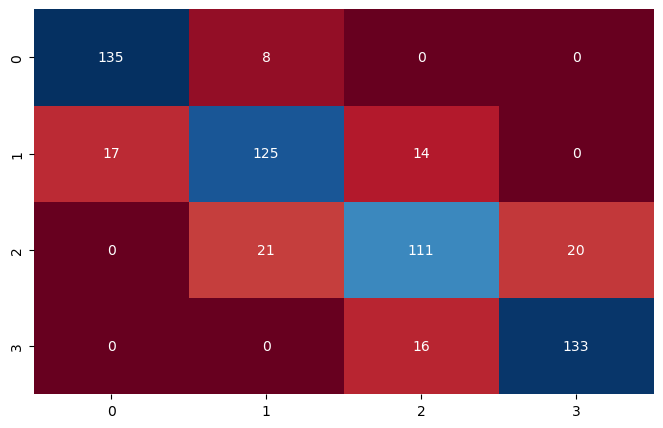

In [88]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=10, min_samples_split=8) # Enter values from best_params
eval_model(dt2,x_train,x_test,y_train,y_test)

In [89]:
update_score_card(model_name = 'Decision Tree with Pruning')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000


In [90]:
# Ensemble Learning

In [91]:
# Bagging Classifier


Training Score is: 99.57000000000001 %
Testing Score is: 89.0 %


Confusion Matrix is
 [[140   3   0   0]
 [ 15 134   7   0]
 [  0  16 126  10]
 [  0   0  15 134]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 0 2 2 1 0 3 1 3 1 3 2 2 2 2 2 2 3 1 1 2 2 2 0 3 3 3 0
 2 1 3 2 0 0 1 3 3 2 2 2 0 0 1 0 0 2 1 3 0 3 0 0 3 0 1 2 0 0 1 0 0 0 2 1 0
 1 3 3 2 3 0 0 2 1 2 0 1 1 0 2 1 3 0 0 1 2 2 2 0 2 0 1 3 1 2 1 2 0 2 0 3 0
 0 3 2 0 0 3 0 1 3 1 1 3 0 1 0 3 2 1 3 1 0 2 1 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 3 0 1 1 2 0 0 3 2 2 2 3 1 2 2 0 3 2 0 0 1 0 1 3 1 2 2 2 1 2 2 0
 3 3 1 2 1 2 2 0 1 3 0 0 1 3 1 3 3 0 2 3 0 3 0 1 3 1 1 3 1 3 0 2 0 2 1 1 2
 3 2 0 2 0 3 3 3 2 3 2 2 3 0 3 1 3 3 2 0 0 0 2 3 0 3 0 2 1 0 1 3 2 2 1 0 2
 2 1 1 0 2 0 3 2 2 3 3 0 1 3 3 1 0 2 1 0 2 0 1 1 1 3 1 0 3 1 2 1 0 1 2 0 1
 2 0 2 1 3 2 0 1 3 2 3 3 0 2 1 0 1 3 2 3 3 0 1 2 3 0 2 2 1 0 0 2 0 3 1 1 2
 2 2 1 0 3 2 2 0 3 2 1 1 0 1 2 1 2 3 2 3 2 1 0 1 3 0 1 3 1 1 0 3 1 0 1 1 0
 1 3 0 2 0 3 0 1 0 2 1 0 0 3 3 2 1 1 1 3 0 3 1 2 2 0 1 3 0 1 0 1 1 0 1

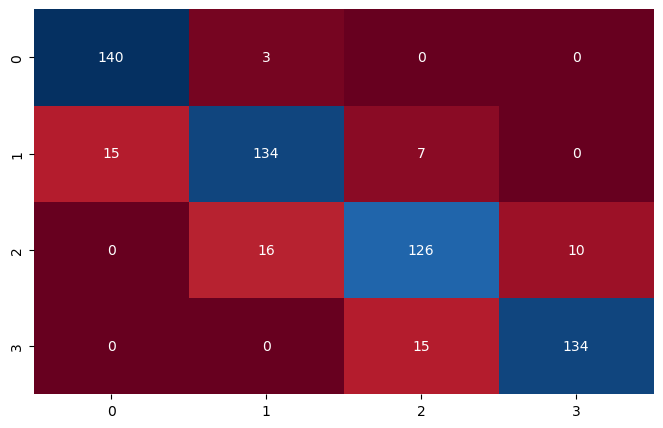

In [92]:
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(bag,x_train,x_test,y_train,y_test)

In [93]:
update_score_card(model_name = 'Bagging Ensemble')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000


In [94]:
# AdaBoost Classifier


Training Score is: 100.0 %
Testing Score is: 80.33 %


Confusion Matrix is
 [[139   4   0   0]
 [ 22 105  29   0]
 [  0  20 111  21]
 [  0   0  22 127]]

Predictions:
 [3 1 3 3 3 1 1 1 1 3 0 1 2 1 0 3 2 3 1 3 2 3 2 2 3 2 3 0 2 1 1 2 0 2 3 3 0
 2 1 3 2 0 0 1 2 3 2 2 2 0 0 1 0 0 2 1 3 0 3 0 0 3 0 1 2 0 0 1 0 0 0 2 1 0
 1 3 3 2 3 0 0 1 1 2 0 1 2 0 2 1 3 0 0 0 2 2 3 0 2 0 1 3 1 2 2 1 0 2 0 3 0
 0 3 2 0 0 2 0 1 3 1 2 3 0 1 1 2 2 1 3 2 0 2 2 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 3 0 0 1 2 0 1 1 1 0 0 3 2 2 1 3 2 2 2 0 3 2 0 0 1 0 1 3 1 2 1 2 2 2 2 0
 3 2 1 2 1 3 2 1 1 3 0 0 1 3 2 3 3 0 2 3 0 2 0 1 3 1 1 3 0 3 0 3 0 1 1 1 2
 3 1 0 2 0 2 3 3 2 3 2 2 3 0 3 1 3 3 3 0 0 0 2 3 0 3 0 2 0 0 1 3 2 2 1 0 2
 2 1 1 0 3 0 3 2 2 3 3 0 1 3 3 1 0 2 1 0 2 0 1 1 2 3 1 0 3 1 1 1 0 0 2 0 1
 2 0 1 1 3 2 0 1 3 1 2 3 0 3 2 0 1 2 2 3 3 0 1 2 3 0 3 2 1 0 0 2 0 3 0 1 2
 2 2 1 0 3 2 2 0 3 2 1 2 0 1 2 1 2 3 2 3 2 2 0 1 3 1 2 3 2 1 0 3 1 0 0 1 0
 1 3 0 2 0 3 1 2 0 2 1 0 1 3 3 2 1 2 1 3 0 3 2 2 2 0 2 3 0 0 0 1 2 0 2 1 0
 1 3 2

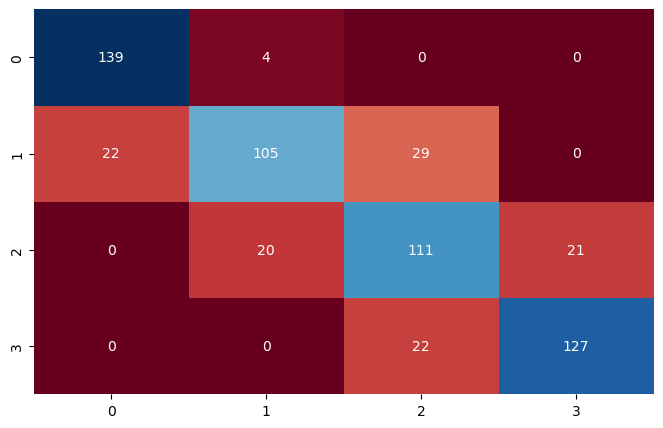

In [95]:
adaboost = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(adaboost,x_train,x_test,y_train,y_test)

In [96]:
update_score_card(model_name = 'Adaboost Ensemble')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333


In [97]:
# XGBoost Classifier


Training Score is: 97.64 %
Testing Score is: 87.0 %


Confusion Matrix is
 [[135   8   0   0]
 [ 10 133  13   0]
 [  0  20 119  13]
 [  0   0  14 135]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 0 2 2 1 0 3 2 3 1 3 2 2 3 2 3 2 3 1 1 2 2 2 0 2 3 3 0
 2 1 3 2 0 0 1 2 3 2 2 2 0 0 1 0 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 1
 1 3 3 2 3 0 0 2 1 2 0 1 1 0 3 1 3 0 0 1 2 2 2 0 2 0 1 3 1 3 1 1 0 2 0 3 0
 0 3 2 0 0 3 0 1 3 1 1 3 0 1 0 3 2 1 3 1 0 2 1 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 2 0 1 1 2 0 0 3 2 2 2 3 1 2 2 0 3 2 0 0 1 0 1 3 1 2 1 2 2 2 2 0
 3 3 1 1 1 2 2 1 1 3 0 0 1 3 2 3 3 0 2 3 0 2 0 1 3 1 1 3 1 3 0 3 0 1 1 1 2
 3 1 1 2 0 3 3 3 2 3 2 2 3 0 3 1 3 3 3 0 0 0 2 3 0 3 0 2 1 0 1 3 2 2 1 0 2
 2 1 1 0 2 0 3 2 2 3 3 0 1 3 3 1 0 2 1 0 2 0 1 1 1 3 1 0 3 1 2 1 0 0 2 0 1
 2 0 1 1 3 2 0 1 3 2 3 3 0 3 1 0 1 2 2 3 3 0 1 2 3 0 2 2 1 0 0 2 0 3 1 1 1
 2 2 1 0 3 2 2 1 3 2 1 1 0 1 2 1 2 3 2 3 2 1 0 1 3 1 1 3 2 1 0 3 1 0 1 1 0
 1 3 0 2 0 3 1 1 0 2 1 0 0 3 3 2 1 2 1 3 0 3 1 2 3 0 1 3 0 1 0 2 1 1 2 1 0
 2 3 2 

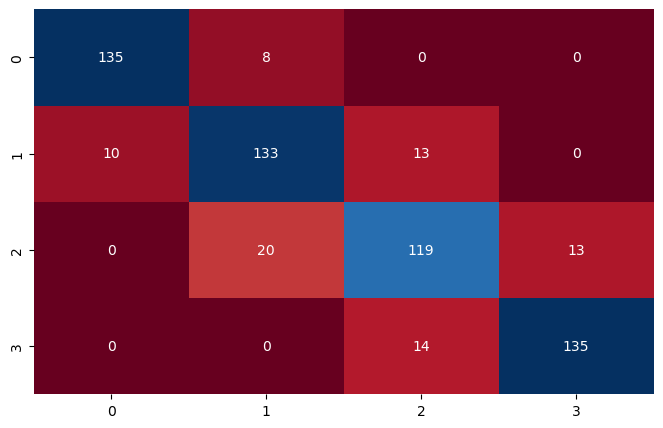

In [98]:
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
eval_model(xgbm,x_train,x_test,y_train,y_test)

In [99]:
update_score_card(model_name = 'XG Boost Ensemble')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000


In [100]:
# Random Forest Classifier


Training Score is: 100.0 %
Testing Score is: 87.33 %


Confusion Matrix is
 [[139   4   0   0]
 [ 10 126  20   0]
 [  0  17 120  15]
 [  0   0  10 139]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 0 2 2 1 0 3 2 3 1 3 2 2 2 2 3 1 3 0 2 2 2 3 0 3 3 3 0
 2 1 3 2 0 0 1 3 3 1 2 2 0 0 1 1 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 1
 1 3 3 2 3 0 0 2 1 2 0 1 2 0 3 2 3 0 0 1 2 2 2 0 2 0 1 3 1 3 1 2 0 2 0 3 0
 0 3 2 0 0 3 0 1 3 1 1 3 0 1 1 3 2 1 3 1 0 2 2 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 2 0 1 1 2 0 0 3 2 2 2 3 1 2 2 0 3 2 1 0 1 0 1 3 1 2 1 2 2 2 2 0
 3 3 1 2 1 3 2 1 1 3 0 0 1 3 1 3 3 0 2 3 0 3 0 1 3 0 1 3 0 2 0 2 0 2 1 1 1
 3 1 0 2 0 3 3 3 2 3 2 2 3 0 2 1 3 3 3 0 0 0 2 3 0 3 0 3 1 0 1 3 2 2 1 0 2
 2 1 1 0 2 0 3 2 2 3 3 0 1 3 3 1 0 2 1 0 2 0 1 2 1 3 1 0 3 1 2 1 0 1 3 1 1
 2 0 1 1 3 3 1 1 3 2 3 3 0 3 1 1 1 2 2 3 3 0 1 2 3 0 2 2 1 0 0 2 0 3 1 1 2
 2 2 1 0 3 2 2 1 3 2 1 2 0 1 2 1 2 3 2 3 2 1 0 1 3 0 2 3 1 1 0 3 1 0 1 0 0
 2 3 0 2 0 3 1 1 0 2 1 1 1 3 3 2 2 2 1 3 0 3 1 2 2 0 1 3 0 1 0 1 1 0 2 1 0
 2 3 2

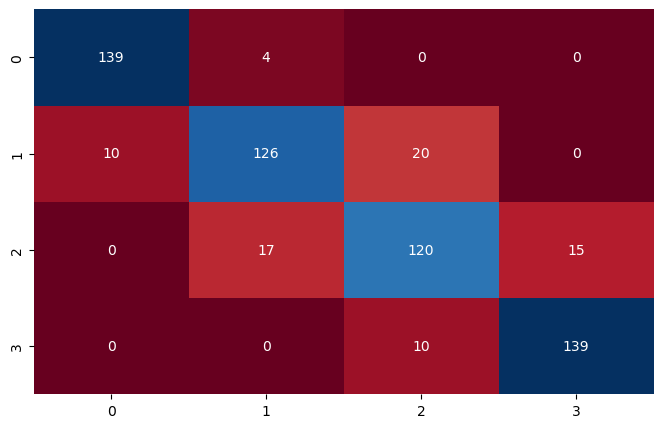

In [101]:
rf = RandomForestClassifier(n_estimators=100, random_state=10)
eval_model(rf,x_train,x_test,y_train,y_test)

In [102]:
update_score_card(model_name = 'Random Forest')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333


In [103]:
# Random Forest with GridSearchCV

In [104]:
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20], 
                     'max_depth': [8, 10], 
                     'min_samples_leaf': [5,10], 
                     'max_leaf_nodes': [10, 15] }]

rf_CV= RandomForestClassifier(random_state = 10)

grid = GridSearchCV(estimator = rf_CV, param_grid = tuned_paramaters, cv = 10)

rf_grid = grid.fit(x_train, y_train)

print('Best parameters for random forest Classifier: ', rf_grid.best_params_, '\n')

Best parameters for random forest Classifier:  {'max_depth': 8, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 85} 




Training Score is: 91.07 %
Testing Score is: 83.67 %


Confusion Matrix is
 [[140   3   0   0]
 [ 17 115  24   0]
 [  0  26 105  21]
 [  0   0   7 142]]

Predictions:
 [3 1 3 2 3 1 1 1 0 3 0 1 3 1 0 3 2 3 1 3 2 3 2 2 3 2 3 0 1 2 2 3 0 3 3 3 0
 2 1 3 2 0 0 1 3 3 1 2 2 0 0 1 1 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 1
 1 3 3 2 3 0 0 2 1 2 0 1 2 0 3 2 3 0 0 1 1 2 2 0 2 0 1 3 1 3 1 1 0 3 0 3 0
 0 3 2 0 0 3 0 1 3 1 1 3 0 1 0 3 2 1 3 1 0 2 2 1 1 1 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 2 0 1 1 2 0 0 3 2 2 3 3 1 2 2 1 3 3 0 0 1 0 1 3 1 3 1 2 1 2 2 0
 3 3 1 1 1 3 2 1 0 3 0 0 1 3 1 3 3 0 2 3 0 3 0 1 3 0 1 3 0 2 0 3 0 2 1 1 1
 3 1 0 2 0 3 3 3 2 3 3 2 3 0 2 1 3 3 3 0 0 0 2 3 0 3 0 2 1 0 1 3 2 3 1 0 2
 2 1 1 0 2 0 3 2 2 3 3 0 1 3 3 1 0 2 1 0 2 0 1 2 1 3 1 0 3 1 2 1 0 1 3 0 1
 2 0 1 0 3 3 0 1 3 2 3 3 0 3 1 1 1 2 2 3 2 0 1 2 3 0 2 3 1 0 0 2 0 3 1 0 2
 2 2 1 0 3 2 2 0 3 2 1 2 0 1 2 1 2 3 2 3 2 2 0 1 3 1 2 3 2 1 0 3 1 0 1 0 0
 2 3 0 2 0 3 1 2 0 1 1 1 0 3 3 2 1 2 1 3 0 3 1 2 2 0 2 3 0 1 0 1 1 0 2 1 0
 2 3 2

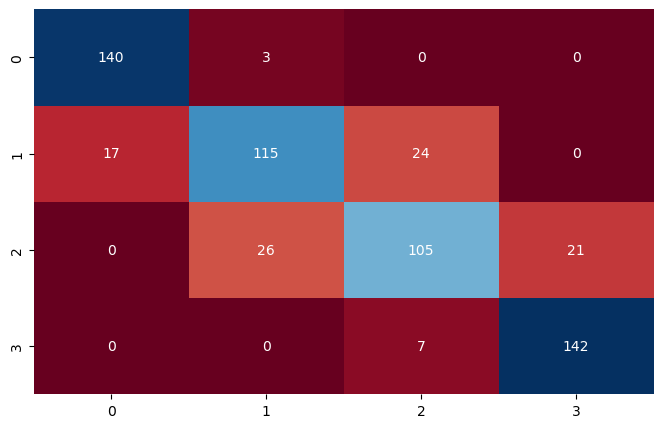

In [105]:
rf2 = RandomForestClassifier(max_depth=8, 
                            max_leaf_nodes=15, 
                            min_samples_leaf=5,
                            min_samples_split=20,
                            n_estimators=85)
eval_model(rf2,x_train,x_test,y_train,y_test)

In [106]:
update_score_card(model_name = 'Random Forest with Pruning')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333
7,Random Forest with Pruning,0.910714,0.836667


In [107]:
# Naive Bayes Classifier


Training Score is: 81.57 %
Testing Score is: 82.33 %


Confusion Matrix is
 [[134   9   0   0]
 [ 13 113  30   0]
 [  0  22 110  20]
 [  0   0  12 137]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 0 2 2 1 0 3 2 3 1 3 2 3 2 2 3 2 3 1 1 2 2 3 0 3 3 3 0
 2 1 3 2 0 0 1 3 3 1 2 2 0 0 1 1 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 1
 1 3 3 2 3 0 0 2 1 3 0 1 2 0 3 2 3 0 0 1 1 2 2 0 2 0 1 3 1 3 1 2 0 2 0 3 0
 0 3 2 0 0 3 0 1 3 1 1 3 0 1 0 3 2 1 3 1 0 2 2 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 3 0 1 1 2 0 0 3 2 2 2 3 1 2 2 1 3 2 0 0 1 0 1 2 1 2 1 2 1 2 2 0
 3 3 2 1 1 3 2 1 0 3 0 0 1 2 1 3 3 0 2 3 0 3 0 1 3 1 1 3 0 3 0 2 0 2 1 1 1
 3 2 1 3 0 3 3 3 2 3 3 2 3 0 3 1 3 3 2 0 0 0 2 2 0 3 0 3 1 0 1 3 2 2 1 0 2
 2 1 1 0 2 0 3 2 2 3 3 0 1 3 3 1 0 2 1 0 2 0 1 2 1 3 1 0 3 1 2 2 0 1 2 1 1
 2 0 1 0 3 3 1 1 3 2 3 3 0 3 1 1 1 3 2 3 3 0 1 2 3 0 2 2 1 0 1 2 0 3 1 0 2
 2 2 0 0 3 2 2 0 3 2 1 2 0 1 2 1 2 3 2 3 2 2 0 2 3 1 2 3 2 1 0 3 1 0 1 0 0
 2 3 0 3 0 3 1 2 1 1 1 0 1 3 3 2 2 2 1 3 0 3 1 2 2 0 2 3 0 1 0 1 1 1 2 1 0
 2 3 2

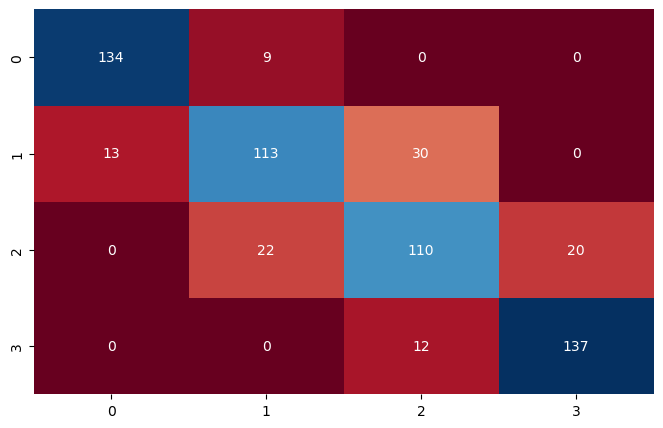

In [108]:
gnb = GaussianNB()
eval_model(gnb,x_train,x_test,y_train,y_test)

In [109]:
update_score_card(model_name = 'Naive Bayes')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333
7,Random Forest with Pruning,0.910714,0.836667
8,Naive Bayes,0.815714,0.823333


In [110]:
# KNN Classifier


Training Score is: 94.64 %
Testing Score is: 92.5 %


Confusion Matrix is
 [[140   3   0   0]
 [  5 145   6   0]
 [  0  14 130   8]
 [  0   0   9 140]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 1 2 2 1 0 3 2 3 1 3 2 2 2 2 3 2 3 0 1 1 2 2 0 3 3 3 0
 2 1 3 2 0 0 2 3 3 2 2 2 0 0 1 1 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 1
 1 3 3 2 3 0 0 2 1 2 0 1 1 0 3 1 3 0 0 1 2 1 2 0 2 0 1 3 1 3 2 2 0 3 0 3 0
 0 3 2 0 0 3 0 1 3 1 0 3 0 1 1 3 2 1 3 1 0 2 1 1 1 2 2 0 3 2 3 2 3 3 2 1 1
 3 2 0 0 1 2 0 1 1 2 0 0 3 2 2 2 3 2 2 2 0 3 2 1 0 1 0 1 3 1 2 1 2 1 2 2 0
 3 3 1 2 1 3 2 0 1 3 0 0 1 3 1 3 3 0 2 3 0 2 0 1 3 1 1 3 1 2 0 3 0 1 1 1 2
 3 2 0 2 0 3 3 3 2 3 2 2 3 0 3 1 3 3 3 0 0 0 2 2 0 3 0 2 1 0 1 3 2 3 1 0 2
 2 1 1 0 3 0 2 2 3 3 3 0 1 3 3 1 0 2 1 0 1 0 1 2 1 3 1 0 3 1 2 1 0 1 3 0 1
 2 0 2 1 3 2 1 1 3 1 3 3 0 3 1 1 1 3 2 3 3 0 1 2 3 0 2 2 1 0 0 2 0 3 1 1 2
 2 2 1 0 3 2 2 1 3 2 1 1 0 1 2 1 2 3 2 3 2 1 0 1 3 1 2 3 1 1 0 3 1 0 1 1 0
 2 3 0 2 0 3 1 1 0 2 2 0 0 3 3 1 2 1 1 3 0 3 1 2 2 0 2 3 0 1 0 1 1 0 1 1 0
 1 3 2 

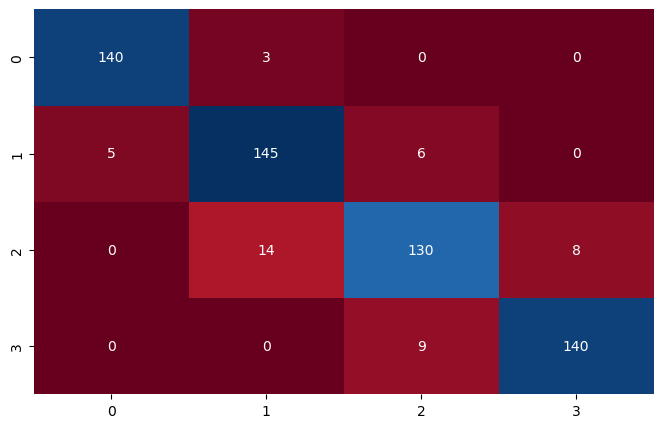

In [111]:
knn1 = KNeighborsClassifier(n_neighbors=9)
eval_model(knn1,x_train,x_test,y_train,y_test)

In [112]:
update_score_card(model_name = 'KNN')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333
7,Random Forest with Pruning,0.910714,0.836667
8,Naive Bayes,0.815714,0.823333
9,KNN,0.946429,0.925000


In [113]:
# To find optimal number of neighbors for KNN

In [114]:
neighbors = list(range(3,51,2))
knn_acc = []
for i in neighbors:
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(x_train,y_train)
    ypred = m.predict(x_test)
    knn_acc.append(accuracy_score(y_test,ypred))

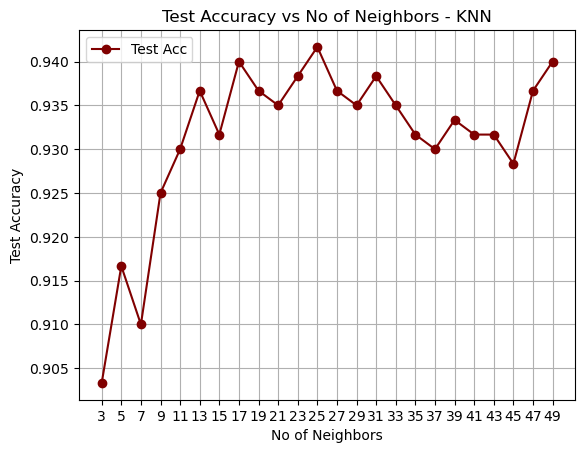

In [115]:
plt.plot(neighbors,knn_acc,color='maroon',label='Test Acc',marker='o')
plt.title('Test Accuracy vs No of Neighbors - KNN')
plt.xlabel('No of Neighbors')
plt.ylabel('Test Accuracy')
plt.xticks(neighbors)
plt.legend()
plt.grid()
plt.show()


Training Score is: 93.0 %
Testing Score is: 94.17 %


Confusion Matrix is
 [[142   1   0   0]
 [  5 144   7   0]
 [  0  10 136   6]
 [  0   0   6 143]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 1 2 2 1 0 3 2 3 1 3 2 3 2 2 3 2 3 0 1 2 2 2 0 3 3 3 0
 2 1 3 2 0 0 1 3 3 2 2 2 0 0 1 1 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 1
 1 3 3 2 3 0 0 2 1 2 0 1 1 0 3 1 3 0 0 1 2 1 2 0 2 0 1 3 1 3 2 2 0 3 0 3 0
 0 3 2 0 0 3 0 1 3 1 1 3 0 1 0 3 2 1 3 1 0 2 1 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 2 0 1 1 2 0 0 3 2 2 2 3 2 2 2 0 3 2 0 0 1 0 1 3 1 2 1 2 1 2 2 0
 3 3 1 2 1 3 2 0 1 3 0 0 1 3 1 3 3 0 2 3 0 2 0 1 3 1 1 3 1 2 0 3 0 1 1 1 2
 3 2 0 2 0 3 3 3 2 3 2 2 3 0 3 1 3 3 3 0 0 0 2 3 0 3 0 2 1 0 1 3 2 3 1 0 2
 2 1 1 0 2 0 2 2 3 3 3 0 1 3 3 1 0 2 1 0 1 0 1 2 1 3 1 0 3 1 2 1 0 1 2 0 2
 2 0 2 1 3 2 1 1 3 2 3 3 0 3 1 1 1 3 2 3 3 0 1 2 3 0 2 2 1 0 0 2 0 3 1 1 2
 2 2 1 0 3 2 2 1 3 2 1 2 0 1 2 1 2 3 2 3 2 1 0 1 3 1 2 3 1 1 0 3 1 0 1 1 0
 2 3 0 2 0 3 1 1 0 2 1 0 1 3 3 2 1 1 1 3 0 3 1 2 2 0 2 3 0 1 0 1 1 0 1 1 0
 2 3 2 

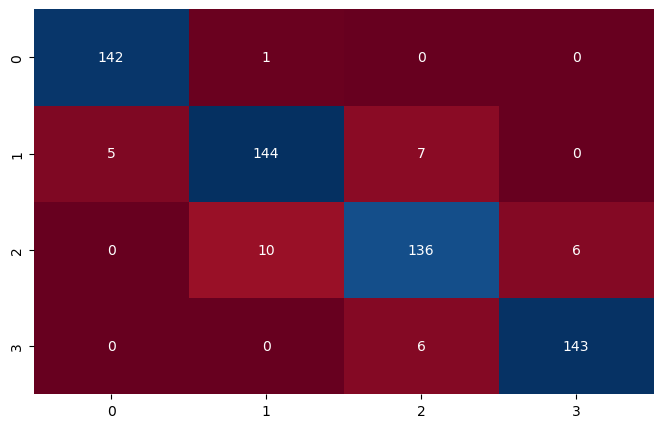

In [116]:
knn2 = KNeighborsClassifier(n_neighbors=25)
eval_model(knn2,x_train,x_test,y_train,y_test)

In [117]:
update_score_card(model_name = 'KNN with tuned parameters')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333
7,Random Forest with Pruning,0.910714,0.836667
8,Naive Bayes,0.815714,0.823333
9,KNN,0.946429,0.925000


In [118]:
# Support Vector Classifier

In [119]:
# SVM using linear kernel


Training Score is: 99.21 %
Testing Score is: 97.67 %


Confusion Matrix is
 [[143   0   0   0]
 [  1 150   5   0]
 [  0   3 147   2]
 [  0   0   3 146]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 1 2 2 1 0 3 2 3 1 3 2 2 2 2 3 2 3 1 1 2 2 3 0 3 3 3 0
 2 1 3 2 0 0 2 3 3 2 2 2 0 0 1 1 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 1
 1 3 3 2 3 0 0 2 1 2 0 1 1 0 3 1 3 0 0 1 2 2 2 0 2 0 1 3 1 3 2 1 0 3 0 3 0
 0 3 2 0 0 3 0 1 2 1 1 3 0 1 0 3 2 1 3 1 0 2 1 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 2 0 1 1 2 0 0 3 2 2 2 3 2 2 2 0 3 2 1 1 1 0 1 3 1 2 1 2 1 2 2 0
 3 3 1 2 1 2 2 1 1 3 0 0 1 3 1 3 3 0 2 3 0 3 0 1 3 1 1 3 1 2 0 3 0 1 2 1 2
 3 2 0 2 0 3 3 3 2 3 3 2 3 0 3 1 3 3 3 0 0 0 2 3 0 3 0 2 1 0 1 3 2 3 1 0 2
 2 1 1 0 2 0 2 2 3 3 3 0 1 3 3 1 0 2 1 0 1 0 1 2 1 3 1 0 3 1 2 1 0 1 2 0 2
 2 0 2 1 3 2 1 1 3 2 3 3 0 3 1 1 1 3 2 3 3 0 1 2 3 0 2 2 1 0 0 2 0 3 1 0 2
 2 2 1 0 3 2 2 1 3 2 1 1 0 1 2 1 2 3 2 3 2 1 0 1 3 1 2 3 1 1 0 3 1 0 1 1 0
 2 3 0 2 0 3 1 1 0 2 1 0 1 3 3 2 2 1 1 3 0 3 2 2 2 0 2 3 0 1 0 1 1 0 2 1 0
 2 3 2

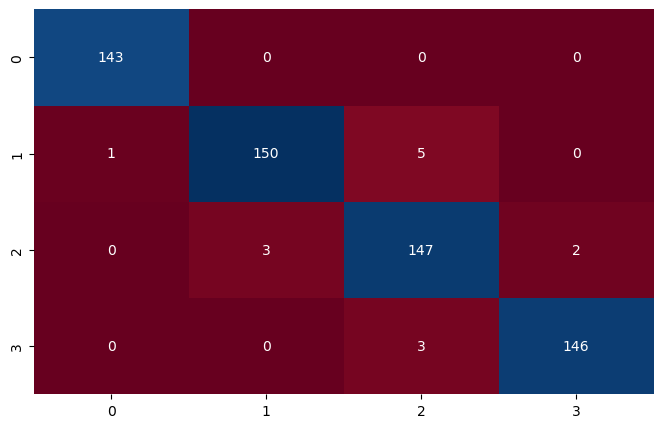

In [120]:
sv1= SVC(kernel='linear')
eval_model(sv1,x_train,x_test,y_train,y_test)

In [121]:
update_score_card(model_name = 'Support Vector using Linear kernel')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333
7,Random Forest with Pruning,0.910714,0.836667
8,Naive Bayes,0.815714,0.823333
9,KNN,0.946429,0.925000


In [122]:
# SVM using Gaussian kernel


Training Score is: 95.21 %
Testing Score is: 95.33 %


Confusion Matrix is
 [[142   1   0   0]
 [  8 145   3   0]
 [  0   8 138   6]
 [  0   0   2 147]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 0 2 2 1 0 3 2 3 1 3 2 3 2 2 3 2 3 0 1 2 2 3 0 3 3 3 0
 2 1 3 2 0 0 2 3 3 2 2 2 0 0 1 1 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 1
 1 3 3 2 3 0 0 2 1 2 0 1 1 0 3 1 3 0 0 1 2 1 2 0 2 0 1 3 1 3 2 1 0 3 0 3 0
 0 3 2 0 0 3 0 1 2 1 1 3 0 1 0 3 2 1 3 1 0 2 1 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 2 0 1 1 2 0 0 3 2 2 2 3 2 2 2 0 3 2 0 0 1 0 1 3 1 2 1 2 1 2 2 0
 3 3 1 2 1 2 2 1 1 3 0 0 1 3 1 3 3 0 2 3 0 3 0 1 3 1 1 3 1 2 0 3 0 1 2 1 2
 3 2 0 2 0 3 3 3 2 3 3 2 3 0 3 1 3 3 3 0 0 0 2 3 0 3 0 2 1 0 1 3 2 3 1 0 2
 2 1 1 0 2 0 2 2 3 3 3 0 1 3 3 1 0 2 1 0 1 0 1 2 1 3 1 0 3 1 2 1 0 0 3 0 1
 2 0 2 1 3 2 0 1 3 2 3 3 0 3 1 1 1 3 2 3 3 0 1 2 3 0 2 2 1 0 0 2 0 3 1 0 2
 2 2 1 0 3 2 2 1 3 2 1 1 0 1 2 1 2 3 2 3 2 1 0 1 3 1 2 3 1 1 0 3 1 0 1 1 0
 1 3 0 2 0 3 1 1 0 2 1 0 0 3 3 2 2 1 1 3 0 3 1 2 2 0 1 3 0 1 0 1 1 0 1 1 0
 2 3 2

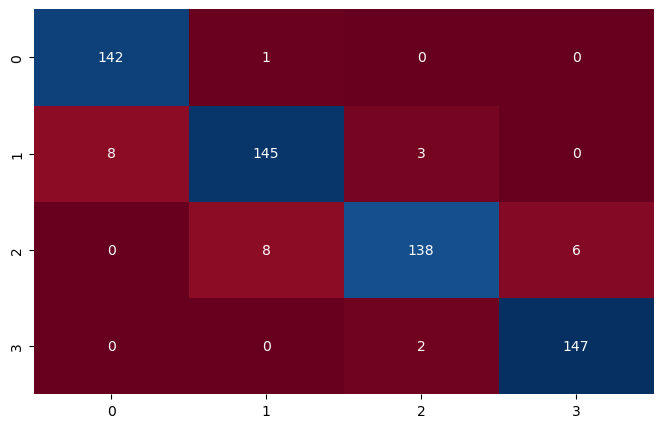

In [123]:
sv_gaussian= SVC(kernel='rbf')
eval_model(sv_gaussian,x_train,x_test,y_train,y_test)

In [124]:
update_score_card(model_name = 'Support Vector using Gaussian kernel')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333
7,Random Forest with Pruning,0.910714,0.836667
8,Naive Bayes,0.815714,0.823333
9,KNN,0.946429,0.925000


In [125]:
# SVM using Sigmoid kernel


Training Score is: 14.21 %
Testing Score is: 13.5 %


Confusion Matrix is
 [[ 72   0   0  71]
 [ 17   0   0 139]
 [  5  17   0 130]
 [ 51  89   0   9]]

Predictions:
 [0 3 0 1 0 3 3 3 0 1 3 3 1 3 3 1 3 1 3 0 3 1 3 3 1 3 0 3 3 3 3 1 0 0 1 1 0
 3 3 1 3 3 3 3 1 0 0 3 3 3 0 3 3 0 3 3 0 3 1 0 0 0 3 3 1 0 3 3 0 3 3 3 3 3
 3 1 0 3 0 0 3 3 3 3 3 3 3 3 1 3 1 0 3 3 1 3 3 0 3 3 3 1 3 1 3 3 0 1 0 1 0
 0 1 3 3 0 1 0 0 3 3 3 1 0 3 3 1 3 3 1 3 3 3 3 3 3 3 3 0 1 3 1 3 0 1 1 3 3
 0 3 0 3 0 3 0 3 3 3 0 0 1 3 3 3 1 3 3 3 3 0 1 0 0 3 3 3 0 3 1 3 3 0 3 3 3
 1 0 3 3 3 1 3 3 0 1 0 0 3 0 3 3 1 0 3 0 0 1 0 3 0 3 3 1 3 3 0 1 0 3 3 3 3
 1 3 3 3 3 1 0 0 1 1 1 3 0 0 3 3 1 1 1 0 3 3 3 1 0 1 3 3 3 0 3 1 3 0 3 0 0
 3 3 3 0 3 3 3 3 0 1 1 3 3 1 1 3 3 3 3 3 3 0 3 3 3 1 3 3 0 3 3 3 0 0 1 3 3
 3 0 3 0 1 3 3 3 0 3 1 0 0 1 3 3 3 3 3 1 1 0 3 1 0 3 3 3 3 3 3 3 3 1 3 3 3
 3 3 0 3 1 3 3 3 1 3 3 3 0 3 3 3 1 1 3 1 3 3 0 3 1 3 3 1 3 3 3 0 3 0 3 0 3
 3 1 0 3 0 0 3 3 3 1 3 0 3 1 0 3 3 3 3 1 0 1 3 3 3 0 3 0 3 3 0 3 0 3 3 3 0
 3 0 3 

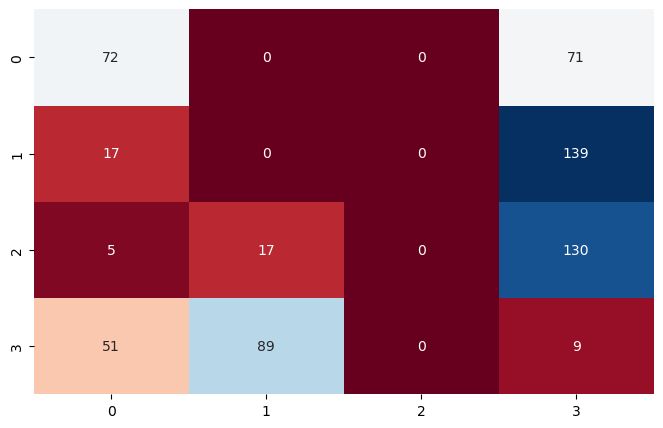

In [126]:
sv_sigmoid= SVC(kernel='sigmoid')
eval_model(sv_sigmoid,x_train,x_test,y_train,y_test)

In [127]:
update_score_card(model_name = 'Support Vector using Sigmoid kernel')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333
7,Random Forest with Pruning,0.910714,0.836667
8,Naive Bayes,0.815714,0.823333
9,KNN,0.946429,0.925000


In [128]:
# SVM using Polynomial kernel


Training Score is: 96.36 %
Testing Score is: 94.67 %


Confusion Matrix is
 [[143   0   0   0]
 [  8 143   5   0]
 [  0   8 138   6]
 [  0   0   5 144]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 0 2 2 1 0 3 2 3 1 3 2 3 2 2 3 2 3 1 1 2 2 3 0 3 3 3 0
 2 1 3 2 0 0 2 3 3 2 2 2 0 0 1 1 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 1
 1 3 3 2 3 0 0 2 1 2 0 1 1 0 3 1 3 0 0 1 2 1 2 0 2 0 1 3 1 3 2 1 0 3 0 3 0
 0 3 2 0 0 3 0 1 2 1 1 3 0 1 0 3 2 1 3 1 0 2 1 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 2 0 1 1 2 0 0 3 2 2 2 3 2 2 2 0 3 3 0 1 1 0 1 3 1 2 1 2 1 2 2 0
 3 3 1 2 1 2 2 0 1 3 0 0 1 3 1 2 3 0 2 3 0 3 0 1 3 1 1 3 0 2 0 3 0 1 2 1 2
 3 2 0 2 0 3 3 3 2 3 3 2 3 0 3 1 3 3 3 0 0 0 2 3 0 3 0 2 0 0 1 3 2 3 1 0 2
 2 1 1 0 2 0 2 2 3 3 3 0 1 3 3 1 0 2 1 0 1 0 1 2 1 3 1 0 3 1 2 1 0 1 3 0 1
 2 0 2 1 3 2 0 1 3 2 3 3 0 3 1 1 1 3 2 3 3 0 1 2 3 0 2 2 1 0 0 2 0 3 1 0 2
 2 2 1 0 3 2 2 1 3 2 1 1 0 1 2 1 2 3 2 3 2 1 0 1 3 1 2 3 1 1 0 3 1 0 1 1 0
 1 3 0 2 0 3 1 1 0 2 1 0 0 3 3 2 2 1 1 3 0 3 1 2 2 0 1 3 0 1 0 1 2 0 1 1 0
 2 3 2

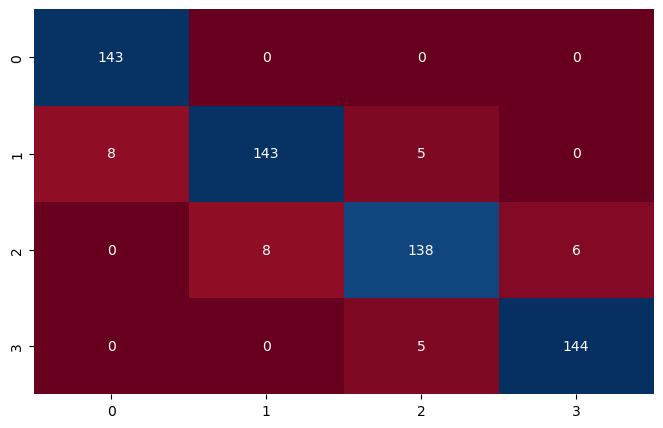

In [129]:
sv_poly= SVC(kernel='poly')
eval_model(sv_poly,x_train,x_test,y_train,y_test)

In [130]:
update_score_card(model_name = 'Support Vector using Polynomial kernel')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333
7,Random Forest with Pruning,0.910714,0.836667
8,Naive Bayes,0.815714,0.823333
9,KNN,0.946429,0.925000


In [131]:
# SVM using Polynomial kernel and degree of polynomial 2


Training Score is: 100.0 %
Testing Score is: 97.17 %


Confusion Matrix is
 [[143   0   0   0]
 [  2 149   5   0]
 [  0   4 146   2]
 [  0   0   4 145]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 1 2 2 1 0 3 2 3 1 3 2 2 2 2 3 2 3 0 1 2 2 3 0 3 3 3 0
 2 1 3 2 0 0 2 3 3 2 2 2 0 0 1 1 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 1
 1 3 3 2 3 0 0 2 1 2 0 1 1 0 3 1 3 0 0 1 2 2 2 0 2 0 1 3 1 3 2 1 0 3 0 3 0
 0 3 2 0 0 3 0 1 3 1 1 3 0 1 0 3 2 1 3 1 0 2 1 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 2 0 1 1 2 0 0 3 2 2 2 3 2 2 2 0 3 2 1 1 1 0 1 3 1 2 1 2 1 2 2 0
 3 3 1 2 1 3 2 1 1 3 0 0 1 3 1 3 3 0 2 3 0 3 0 1 3 1 1 3 1 2 0 3 0 1 2 1 2
 3 2 0 2 0 3 3 3 2 3 3 2 3 0 3 1 3 3 3 0 0 0 2 3 0 3 0 2 1 0 1 2 2 3 1 0 2
 2 1 1 0 2 0 2 2 3 3 3 0 1 3 3 1 0 2 1 0 1 0 1 2 1 2 1 0 3 1 2 1 0 1 2 0 1
 2 0 2 1 3 2 1 1 3 2 3 3 0 3 1 1 1 3 2 3 3 0 1 2 3 0 2 2 1 0 0 2 0 3 1 0 2
 2 2 1 0 3 2 2 1 3 2 1 1 0 1 2 1 2 3 2 3 2 1 0 1 3 1 2 3 1 1 0 3 1 0 1 1 0
 2 3 0 2 0 3 1 1 0 2 1 0 1 3 3 2 2 2 1 3 0 3 2 2 2 0 2 3 0 1 0 1 2 0 2 1 0
 2 3 2

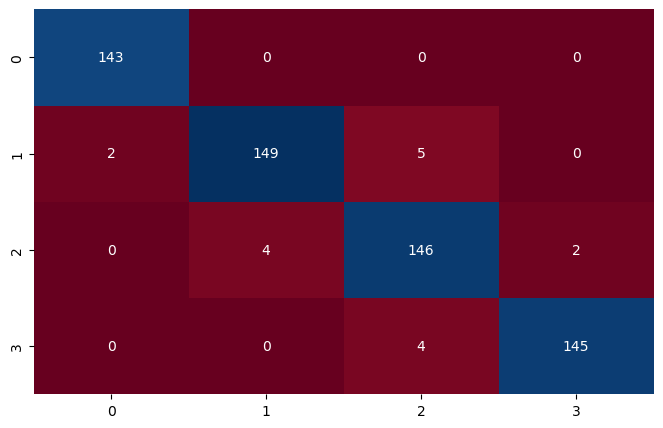

In [132]:
sv_poly2= SVC(kernel='poly', degree = 2, gamma = 'auto')
eval_model(sv_poly2,x_train,x_test,y_train,y_test)

In [133]:
update_score_card(model_name = 'Support Vector using Polynomial kernel with degree 2')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333
7,Random Forest with Pruning,0.910714,0.836667
8,Naive Bayes,0.815714,0.823333
9,KNN,0.946429,0.925000


In [134]:
# SVM using Polynomial kernel  using GridSearchCV

In [135]:
tuned_paramaters = [{ 'degree': [2, 4], 'gamma' : ['auto','scale' ], 'C': [0.5, 1] }]

svm_CV= SVC(random_state = 10)

grid = GridSearchCV(estimator=svm_CV , param_grid=tuned_paramaters, scoring='accuracy', cv= 5)

svm_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', svm_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'C': 1, 'degree': 2, 'gamma': 'scale'} 




Training Score is: 96.14 %
Testing Score is: 95.33 %


Confusion Matrix is
 [[143   0   0   0]
 [  6 145   5   0]
 [  0   8 140   4]
 [  0   0   5 144]]

Predictions:
 [3 1 3 2 3 1 1 1 1 3 0 2 2 1 0 3 2 3 1 3 2 2 2 2 3 2 3 1 1 2 2 3 0 3 3 3 0
 2 1 3 2 0 0 2 3 3 2 2 2 0 0 1 1 0 2 1 3 0 3 0 0 3 1 1 2 0 0 1 0 0 0 2 1 1
 1 3 3 2 3 0 0 2 1 2 0 1 1 0 3 1 3 0 0 1 2 1 2 0 2 0 1 3 1 3 2 1 0 3 0 3 0
 0 3 2 0 0 3 0 1 2 1 1 3 0 1 0 3 2 1 3 1 0 2 1 1 1 2 2 0 3 2 3 2 3 3 2 1 0
 3 2 0 0 1 2 0 1 1 2 0 0 3 2 2 2 3 2 2 2 0 3 2 0 0 1 0 1 3 1 2 1 2 1 2 2 0
 3 3 1 2 1 2 2 1 1 3 0 0 1 3 1 2 3 0 2 3 0 3 0 1 3 1 1 3 0 2 0 3 0 1 2 1 2
 3 2 0 2 0 3 3 3 2 3 3 2 3 0 3 1 3 3 3 0 0 0 2 3 0 3 0 2 1 0 1 3 2 3 1 0 2
 2 1 1 0 2 0 2 2 3 3 3 0 1 3 3 1 0 2 1 0 1 0 1 2 1 3 1 0 3 1 2 1 0 1 3 0 1
 2 0 2 1 3 2 1 1 3 2 3 3 0 3 1 1 1 3 2 3 3 0 1 2 3 0 2 2 1 0 0 2 0 3 1 0 2
 2 2 1 0 3 2 2 1 3 2 1 1 0 1 2 1 2 3 2 3 2 1 0 1 3 1 2 3 1 1 0 3 1 0 1 1 0
 1 3 0 2 0 3 1 1 0 2 1 0 0 3 3 2 2 1 1 3 0 3 1 2 2 0 1 3 0 1 0 1 2 0 1 1 0
 2 3 2

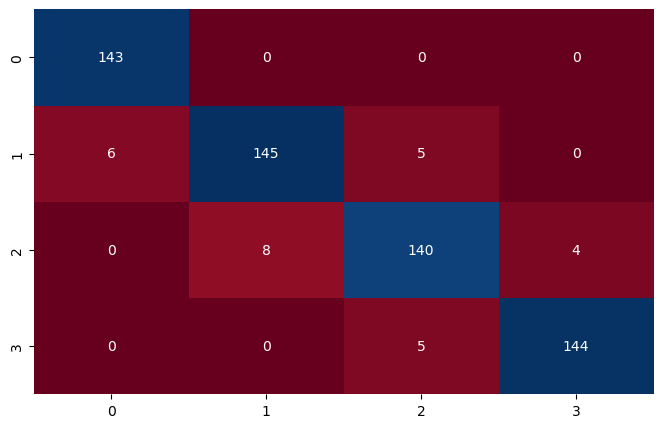

In [136]:
sv_poly_cv= SVC(kernel='poly', C=1, degree=2, gamma='scale')
eval_model(sv_poly_cv,x_train,x_test,y_train,y_test)

In [137]:
update_score_card(model_name = 'Support Vector Polynomial with Grid search CV')

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333
7,Random Forest with Pruning,0.910714,0.836667
8,Naive Bayes,0.815714,0.823333
9,KNN,0.946429,0.925000


In [138]:
# Model Comparision

In [139]:
score_card

,Model,Train Score,Test Score
0,Logistic Regression,0.764286,0.753333
1,Logistic Regression using SGD,0.471429,0.475000
2,Decision Tree with Pruning,0.980000,0.840000
3,Bagging Ensemble,0.995714,0.890000
4,Adaboost Ensemble,1.000000,0.803333
5,XG Boost Ensemble,0.976429,0.870000
6,Random Forest,1.000000,0.873333
7,Random Forest with Pruning,0.910714,0.836667
8,Naive Bayes,0.815714,0.823333
9,KNN,0.946429,0.925000
